### Data Preparation

 Data Offset 5 days

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [ ]:
df = pd.read_csv('df_nl_cases_mob2.csv')

In [ ]:
df.head(10)

,Date,Cases,Country_Code,Country,SubRegion,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,10/03/2020,2,MX,Mexico,Nuevo Leon,2,6,2,7,7,-1
1,11/03/2020,4,MX,Mexico,Nuevo Leon,4,4,8,3,5,-1
2,13/03/2020,5,MX,Mexico,Nuevo Leon,4,13,10,11,6,-2
3,14/03/2020,6,MX,Mexico,Nuevo Leon,2,15,14,6,5,-2
4,16/03/2020,6,MX,Mexico,Nuevo Leon,-22,3,-24,-38,-64,19
5,17/03/2020,6,MX,Mexico,Nuevo Leon,-14,4,-23,-19,-12,7
6,18/03/2020,9,MX,Mexico,Nuevo Leon,-21,-2,-22,-31,-20,10
7,19/03/2020,4,MX,Mexico,Nuevo Leon,-28,-4,-27,-37,-25,12
8,20/03/2020,12,MX,Mexico,Nuevo Leon,-34,-6,-39,-37,-24,15
9,21/03/2020,4,MX,Mexico,Nuevo Leon,-42,-11,-53,-42,-15,14


In [ ]:
df['retail_and_recreation_percent_change_from_baseline'] = df['retail_and_recreation_percent_change_from_baseline'].shift(5)
df['grocery_and_pharmacy_percent_change_from_baseline'] = df['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df['parks_percent_change_from_baseline'] = df['parks_percent_change_from_baseline'].shift(5)
df['transit_stations_percent_change_from_baseline'] = df['transit_stations_percent_change_from_baseline'].shift(5)
df['workplaces_percent_change_from_baseline'] = df['workplaces_percent_change_from_baseline'].shift(5)
df['residential_percent_change_from_baseline'] = df['residential_percent_change_from_baseline'].shift(5)

In [ ]:
df.head(10)

,Date,Cases,Country_Code,Country,SubRegion,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,10/03/2020,2,MX,Mexico,Nuevo Leon,NaN,NaN,NaN,NaN,NaN,NaN
1,11/03/2020,4,MX,Mexico,Nuevo Leon,NaN,NaN,NaN,NaN,NaN,NaN
2,13/03/2020,5,MX,Mexico,Nuevo Leon,NaN,NaN,NaN,NaN,NaN,NaN
3,14/03/2020,6,MX,Mexico,Nuevo Leon,NaN,NaN,NaN,NaN,NaN,NaN
4,16/03/2020,6,MX,Mexico,Nuevo Leon,NaN,NaN,NaN,NaN,NaN,NaN
5,17/03/2020,6,MX,Mexico,Nuevo Leon,2.0,6.0,2.0,7.0,7.0,-1.0
6,18/03/2020,9,MX,Mexico,Nuevo Leon,4.0,4.0,8.0,3.0,5.0,-1.0
7,19/03/2020,4,MX,Mexico,Nuevo Leon,4.0,13.0,10.0,11.0,6.0,-2.0
8,20/03/2020,12,MX,Mexico,Nuevo Leon,2.0,15.0,14.0,6.0,5.0,-2.0
9,21/03/2020,4,MX,Mexico,Nuevo Leon,-22.0,3.0,-24.0,-38.0,-64.0,19.0


Check missing values

In [ ]:
pd.DataFrame(df.isnull().sum(),columns=["Count"])

,Count
Date,0
Cases,0
Country_Code,0
Country,0
SubRegion,0
retail_and_recreation_percent_change_from_baseline,5
grocery_and_pharmacy_percent_change_from_baseline,5
parks_percent_change_from_baseline,5
transit_stations_percent_change_from_baseline,5
workplaces_percent_change_from_baseline,5


In [ ]:
df = df.dropna()     

In [ ]:
pd.DataFrame(df.isnull().sum(),columns=["Count"])

,Count
Date,0
Cases,0
Country_Code,0
Country,0
SubRegion,0
retail_and_recreation_percent_change_from_baseline,0
grocery_and_pharmacy_percent_change_from_baseline,0
parks_percent_change_from_baseline,0
transit_stations_percent_change_from_baseline,0
workplaces_percent_change_from_baseline,0


In [ ]:
df

,Date,Cases,Country_Code,Country,SubRegion,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5,17/03/2020,6,MX,Mexico,Nuevo Leon,2.0,6.0,2.0,7.0,7.0,-1.0
6,18/03/2020,9,MX,Mexico,Nuevo Leon,4.0,4.0,8.0,3.0,5.0,-1.0
7,19/03/2020,4,MX,Mexico,Nuevo Leon,4.0,13.0,10.0,11.0,6.0,-2.0
8,20/03/2020,12,MX,Mexico,Nuevo Leon,2.0,15.0,14.0,6.0,5.0,-2.0
9,21/03/2020,4,MX,Mexico,Nuevo Leon,-22.0,3.0,-24.0,-38.0,-64.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
344,22/02/2021,272,MX,Mexico,Nuevo Leon,-27.0,-4.0,-46.0,-46.0,-30.0,12.0
345,23/02/2021,257,MX,Mexico,Nuevo Leon,-33.0,-8.0,-56.0,-47.0,-32.0,15.0
346,24/02/2021,224,MX,Mexico,Nuevo Leon,-32.0,-3.0,-54.0,-42.0,-26.0,14.0
347,25/02/2021,219,MX,Mexico,Nuevo Leon,-27.0,13.0,-45.0,-34.0,-4.0,5.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Date,Cases,Country_Code,Country,SubRegion,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5,2020-03-17,6,MX,Mexico,Nuevo Leon,2.0,6.0,2.0,7.0,7.0,-1.0
6,2020-03-18,9,MX,Mexico,Nuevo Leon,4.0,4.0,8.0,3.0,5.0,-1.0
7,2020-03-19,4,MX,Mexico,Nuevo Leon,4.0,13.0,10.0,11.0,6.0,-2.0
8,2020-03-20,12,MX,Mexico,Nuevo Leon,2.0,15.0,14.0,6.0,5.0,-2.0
9,2020-03-21,4,MX,Mexico,Nuevo Leon,-22.0,3.0,-24.0,-38.0,-64.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
344,2021-02-22,272,MX,Mexico,Nuevo Leon,-27.0,-4.0,-46.0,-46.0,-30.0,12.0
345,2021-02-23,257,MX,Mexico,Nuevo Leon,-33.0,-8.0,-56.0,-47.0,-32.0,15.0
346,2021-02-24,224,MX,Mexico,Nuevo Leon,-32.0,-3.0,-54.0,-42.0,-26.0,14.0
347,2021-02-25,219,MX,Mexico,Nuevo Leon,-27.0,13.0,-45.0,-34.0,-4.0,5.0


In [ ]:
df.dtypes

Date                                                  datetime64[ns]
Cases                                                          int64
Country_Code                                                  object
Country                                                       object
SubRegion                                                     object
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [ ]:
df.drop(['Country_Code','Country','SubRegion'], axis=1, inplace=True)

In [ ]:
cases = df.set_index('Date').asfreq('D')

In [ ]:
cases.head(10)

,Cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Date,,,,,,,
2020-03-17,6.0,2.0,6.0,2.0,7.0,7.0,-1.0
2020-03-18,9.0,4.0,4.0,8.0,3.0,5.0,-1.0
2020-03-19,4.0,4.0,13.0,10.0,11.0,6.0,-2.0
2020-03-20,12.0,2.0,15.0,14.0,6.0,5.0,-2.0
2020-03-21,4.0,-22.0,3.0,-24.0,-38.0,-64.0,19.0
2020-03-22,4.0,-14.0,4.0,-23.0,-19.0,-12.0,7.0
2020-03-23,5.0,-21.0,-2.0,-22.0,-31.0,-20.0,10.0
2020-03-24,5.0,-28.0,-4.0,-27.0,-37.0,-25.0,12.0
2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cases.dropna(inplace=True)

In [ ]:
cases

,Cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Date,,,,,,,
2020-03-17,6.0,2.0,6.0,2.0,7.0,7.0,-1.0
2020-03-18,9.0,4.0,4.0,8.0,3.0,5.0,-1.0
2020-03-19,4.0,4.0,13.0,10.0,11.0,6.0,-2.0
2020-03-20,12.0,2.0,15.0,14.0,6.0,5.0,-2.0
2020-03-21,4.0,-22.0,3.0,-24.0,-38.0,-64.0,19.0
...,...,...,...,...,...,...,...
2021-02-22,272.0,-27.0,-4.0,-46.0,-46.0,-30.0,12.0
2021-02-23,257.0,-33.0,-8.0,-56.0,-47.0,-32.0,15.0
2021-02-24,224.0,-32.0,-3.0,-54.0,-42.0,-26.0,14.0


### Data Visualization

In [ ]:
import seaborn as sns

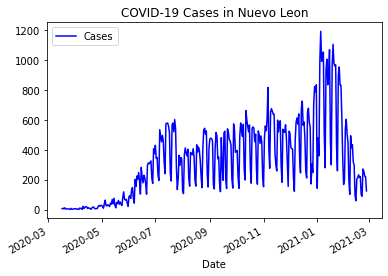

In [ ]:
df.plot(kind='line',x='Date',y='Cases',color='blue')
plt.title('COVID-19 Cases in Nuevo Leon')
plt.show()

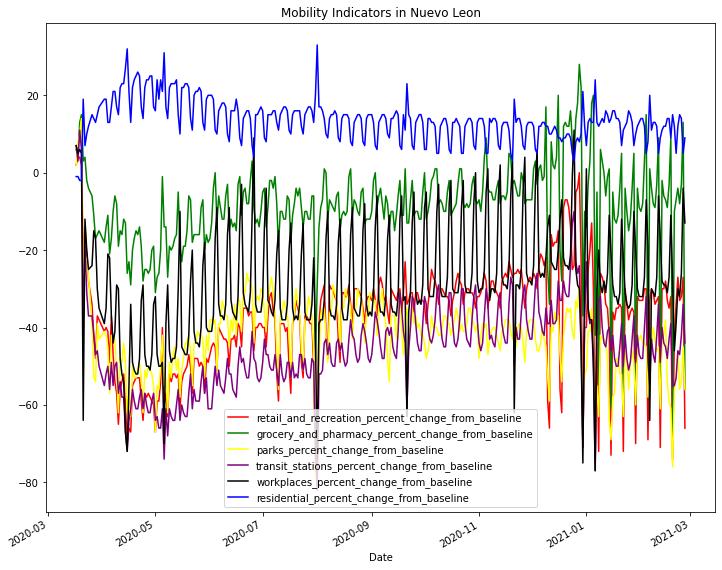

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.gca()


#df.plot(kind='line',x='Date',y='Cases',ax=ax)
df.plot(kind='line',x='Date',y='retail_and_recreation_percent_change_from_baseline', color='red', ax=ax)
df.plot(kind='line',x='Date',y='grocery_and_pharmacy_percent_change_from_baseline', color='green', ax=ax)
df.plot(kind='line',x='Date',y='parks_percent_change_from_baseline', color='yellow', ax=ax)
df.plot(kind='line',x='Date',y='transit_stations_percent_change_from_baseline', color='purple', ax=ax)
df.plot(kind='line',x='Date',y='workplaces_percent_change_from_baseline', color='black', ax=ax)
df.plot(kind='line',x='Date',y='residential_percent_change_from_baseline', color='blue', ax=ax)

plt.title('Mobility Indicators in Nuevo Leon')

plt.show()

Feature Selection (Filter Method using Pearson Correlation)

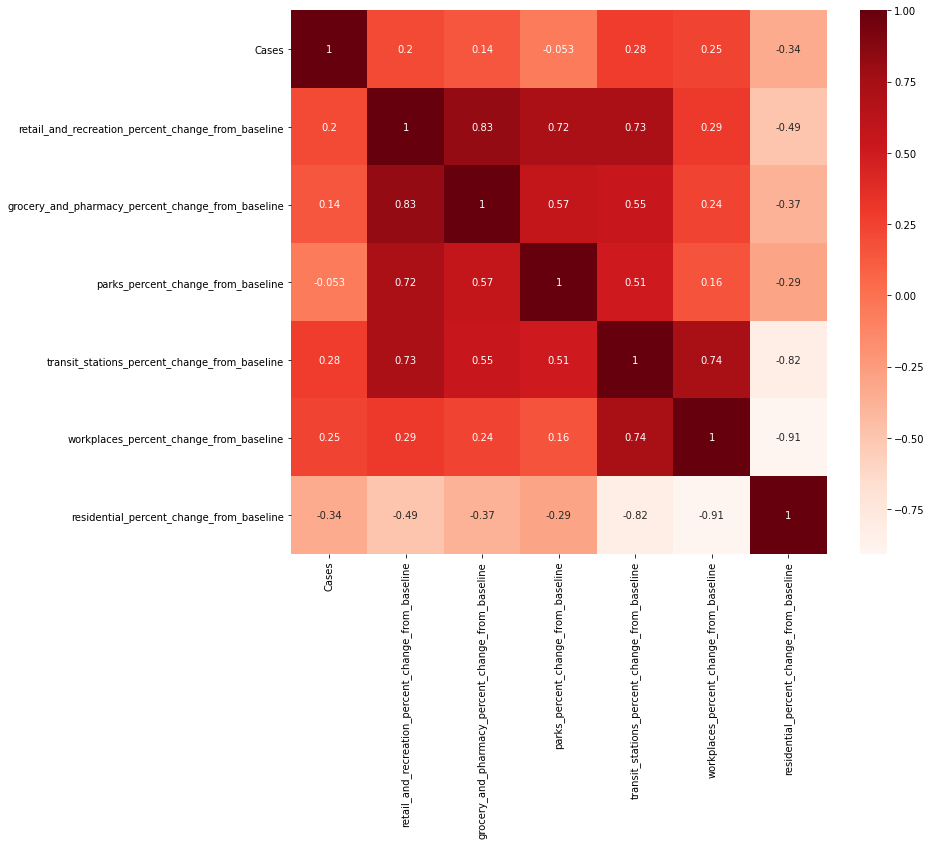

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Feature Selecion (Backward Elimination)

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]
y = df["Cases"]      

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

In [ ]:
print(selected_features_BE)

['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']


### Train and test split

In [ ]:
df.isnull().any()

Date                                                  False
Cases                                                 False
retail_and_recreation_percent_change_from_baseline    False
grocery_and_pharmacy_percent_change_from_baseline     False
parks_percent_change_from_baseline                    False
transit_stations_percent_change_from_baseline         False
workplaces_percent_change_from_baseline               False
residential_percent_change_from_baseline              False
dtype: bool

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df['Cases']
X = df[['transit_stations_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

#X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### Prediction using ML models

In [ ]:
model_scores = []

Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
model = LinearRegression().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
y_pred_ml = y_pred
mse = mean_squared_error(y_test, y_pred)
rmse_ml = math.sqrt(mse)

print('RMSE: {}'.format(rmse_ml))
ml = model.score(X_test, y_test)

Training score: 0.20254526293211783
Test score: 0.15617196167765346
RMSE: 217.6375697096671


Polynomial Regression

In [ ]:
train_ml=cases.iloc[:int(cases.shape[0]*0.95)]
valid_ml=cases.iloc[int(cases.shape[0]*0.95):]

In [ ]:
train_ml = train_ml.dropna()  
valid_ml = valid_ml.dropna()   

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) 

In [ ]:
train_poly=poly.fit_transform(train_ml[['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']])
valid_poly=poly.fit_transform(valid_ml[['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']])
y=train_ml["Cases"]

In [ ]:
train_poly.shape

(326, 15)

In [ ]:
y.shape

(326,)

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Cases"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  501.54549611240975


In [ ]:
import plotly.graph_objects as go

#cases[['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
comp_data=poly.fit_transform(df[['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']])
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=cases.index, y=cases["Cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=cases.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


<Figure size 792x432 with 0 Axes>

### Time Series Forecasting

In [ ]:
y = cases[['Cases']]
y = y.asfreq('D')
y.fillna(0)
y.dropna(inplace=True)

In [ ]:
y

,Cases
Date,
2020-03-17,6.0
2020-03-18,9.0
2020-03-19,4.0
2020-03-20,12.0
2020-03-21,4.0
...,...
2021-02-22,272.0
2021-02-23,257.0
2021-02-24,224.0


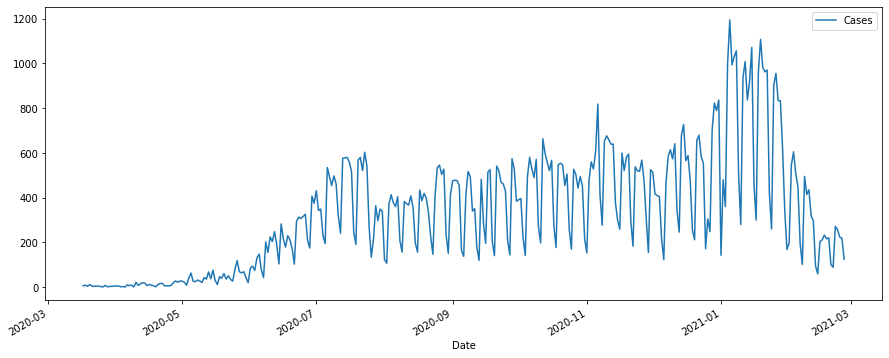

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: ignored

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
model_train=cases.iloc[:int(cases.shape[0]*0.95)]
valid=cases.iloc[int(cases.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_train = model_train.dropna()  
valid = valid.dropna()   

Time Series Forecasting (AR Model)

In [ ]:
model_ar= auto_arima(model_train["Cases"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Cases"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4282.202, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4283.287, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4227.965, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4228.192, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4206.167, Time=0.14 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 0.636 seconds


ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Cases"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Cases"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  213.73918902926695


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Time Series Forecasting (SARIMA)

In [ ]:
model_sarima= auto_arima(model_train["Cases"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Cases"])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3977.737, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4282.202, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3990.727, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4104.392, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4280.226, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=4141.151, Time=0.24 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=4018.405, Time=0.40 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=3966.385, Time=1.90 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=4003.985, Time=1.21 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=3965.725, Time=1.58 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=4073.542, Time=0.40 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3937.262, Time=1.99 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=4064.406, Time=0.52 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : 

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Cases"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Cases"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  292.70337605721176


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Facebook Prophet Model

In [ ]:
from fbprophet import Prophet

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(cases.index),list(cases["Cases"])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(cases["Cases"],confirmed_forecast['yhat'].head(cases.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(cases["Cases"],confirmed_forecast['yhat'].head(cases.shape[0]))))

Root Mean Squared Error for Prophet Model:  157.0204870087658


Figure(720x432)


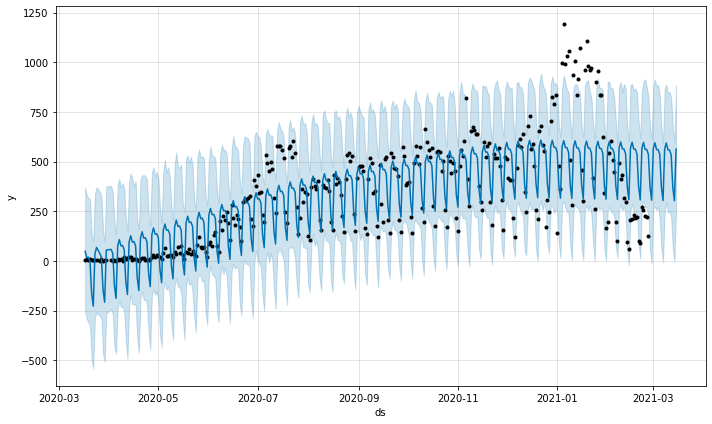

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


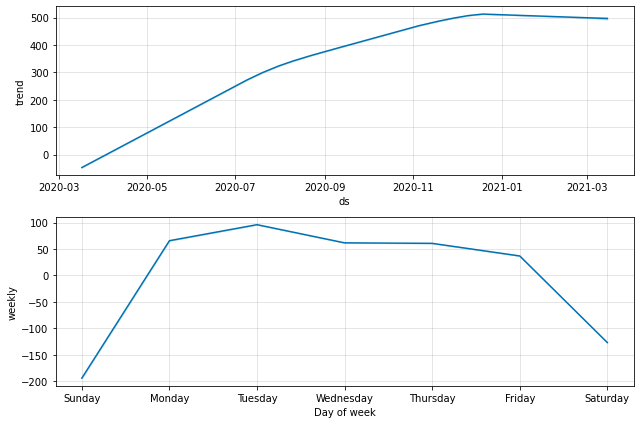

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

Multivariate Time Series Forecasting (VAR)

Vector Auto Regression (VAR)

In [ ]:
# loading essential libraries first
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

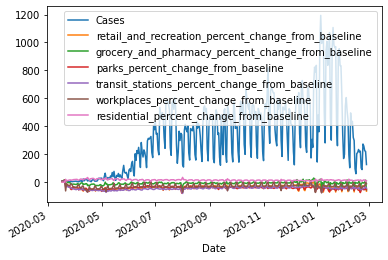

In [ ]:
cases.plot()

In [ ]:
cases = cases.dropna()     

In [ ]:
cases.head(5)

,Cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Date,,,,,,,
2020-03-17,6.0,2.0,6.0,2.0,7.0,7.0,-1.0
2020-03-18,9.0,4.0,4.0,8.0,3.0,5.0,-1.0
2020-03-19,4.0,4.0,13.0,10.0,11.0,6.0,-2.0
2020-03-20,12.0,2.0,15.0,14.0,6.0,5.0,-2.0
2020-03-21,4.0,-22.0,3.0,-24.0,-38.0,-64.0,19.0


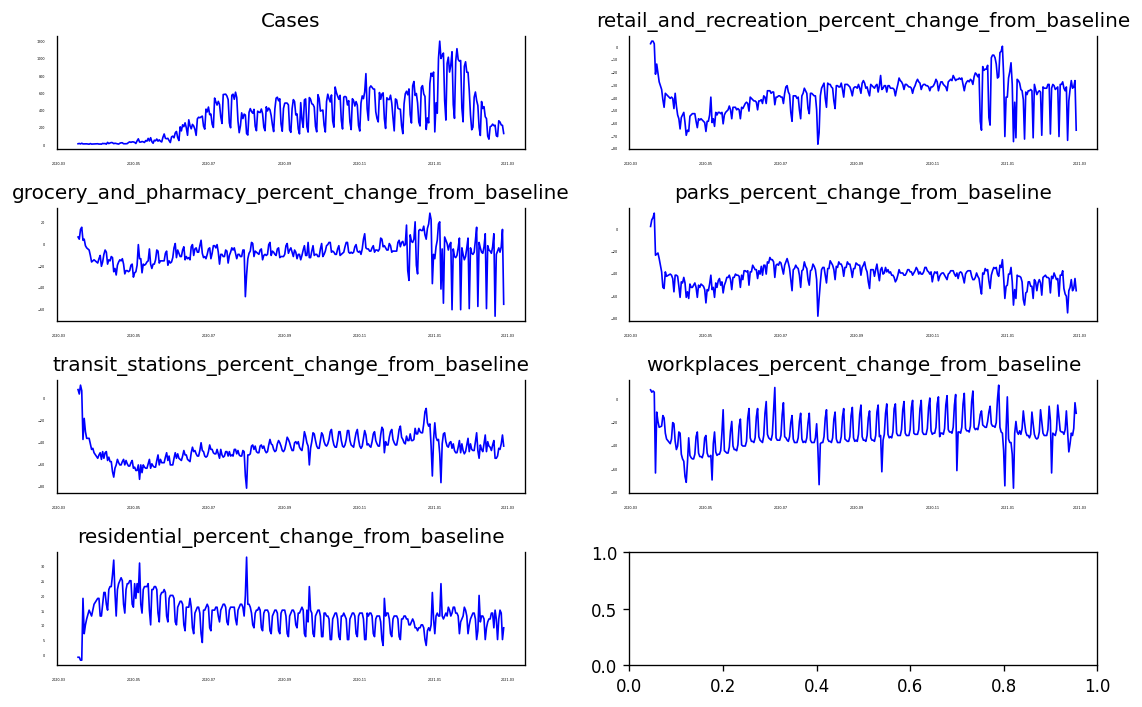

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i < 7:
      data = cases[cases.columns[i]]
      ax.plot(data, color='blue', linewidth=1)
      # Decorations
      ax.set_title(cases.columns[i])
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=2)

plt.tight_layout();

Casualties between Series

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(cases, variables = cases.columns)    

,Cases_x,retail_and_recreation_percent_change_from_baseline_x,grocery_and_pharmacy_percent_change_from_baseline_x,parks_percent_change_from_baseline_x,transit_stations_percent_change_from_baseline_x,workplaces_percent_change_from_baseline_x,residential_percent_change_from_baseline_x
Cases_y,1.0,0.0,0.0,0.0,0.0,0.0,0.0
retail_and_recreation_percent_change_from_baseline_y,0.0,1.0,0.0,0.0,0.0,0.0,0.0
grocery_and_pharmacy_percent_change_from_baseline_y,0.0,0.0,1.0,0.0,0.0,0.0,0.0
parks_percent_change_from_baseline_y,0.0,0.0,0.0,1.0,0.0,0.0,0.0
transit_stations_percent_change_from_baseline_y,0.0,0.0,0.0,0.0,1.0,0.0,0.0
workplaces_percent_change_from_baseline_y,0.0,0.0,0.0,0.0,0.0,1.0,0.0
residential_percent_change_from_baseline_y,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Cointegration Test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(cases)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Cases  ::  174.11    > 111.7797  =>   True
retail_and_recreation_percent_change_from_baseline ::  108.26    > 83.9383   =>   True
grocery_and_pharmacy_percent_change_from_baseline ::  56.45     > 60.0627   =>   False
parks_percent_change_from_baseline ::  29.9      > 40.1749   =>   False
transit_stations_percent_change_from_baseline ::  9.69      > 24.2761   =>   False
workplaces_percent_change_from_baseline ::  1.64      > 12.3212   =>   False
residential_percent_change_from_baseline ::  0.01      > 4.1296    =>   False


In [ ]:
nobs = 18
df_train, df_test = cases[0:-nobs], cases[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(326, 7)
(18, 7)


In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5933
 No. Lags Chosen       = 13
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.487. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "retail_and_recreation_percent_change_from_baseline" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.986
 No. Lags Chosen       = 12
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.2927. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "grocery_and_pharmacy_percent_change_from_basel

In [ ]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8177
 No. Lags Chosen       = 12
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "retail_and_recreation_percent_change_from_baseline" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7556
 No. Lags Chosen       = 10
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "grocery_and_pharmacy_percent_change_from_baseline" 
    --------------------------------------

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  29.00608853179874
BIC :  29.65955037403445
FPE :  3955621338216.787
HQIC:  29.266914515627445 

Lag Order = 2
AIC :  27.250458157714366
BIC :  28.478487550712444
FPE :  683796466381.8595
HQIC:  27.74067320360114 

Lag Order = 3
AIC :  26.61782579891897
BIC :  28.423046103309776
FPE :  363599323544.34875
HQIC:  27.338527241384668 

Lag Order = 4
AIC :  25.761474438012087
BIC :  28.146529104664403
FPE :  154727663019.38934
HQIC:  26.71376806775641 

Lag Order = 5
AIC :  25.29180548146285
BIC :  28.259358265650445
FPE :  97050852465.4382
HQIC:  26.476805634547166 

Lag Order = 6
AIC :  23.752316794388655
BIC :  27.30505197287843
FPE :  20917937506.46634
HQIC:  25.17114644260805 

Lag Order = 7
AIC :  23.391265664253478
BIC :  27.531888255363736
FPE :  14678937883.05513
HQIC:  25.045056506717124 

Lag Order = 8
AIC :  23.220042048219565
BIC :  27.951278034897907
FPE :  12483967465.851318
HQIC:  25.109934604158905 

Lag Order = 9
AIC :  23.215054012034418
BIC :  28.5396

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,30.34,30.42,1.503e+13,30.37
1,28.56,29.23,2.532e+12,28.83
2,26.74,27.99,4.094e+11,27.24
3,26.12,27.96,2.209e+11,26.86
4,25.53,27.96,1.232e+11,26.50
5,25.04,28.06,7.555e+10,26.25
6,23.48,27.09*,1.600e+10,24.92
7,23.20,27.39,1.211e+10,24.87*
8,23.05,27.83,1.054e+10,24.96
9,23.11,28.47,1.134e+10,25.25


In [ ]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Jun, 2021
Time:                     17:36:46
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    28.5397
Nobs:                     316.000    HQIC:                   25.3422
Log likelihood:          -6358.67    FPE:                1.25729e+10
AIC:                      23.2151    Det(Omega_mle):     3.45747e+09
--------------------------------------------------------------------
Results for equation Cases
                                                           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------
const                                                         1.505864         4.751903            0.317           0.751
L1.Cases             

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(cases.columns, out):
    print(col, ':', round(val, 2))

Cases : 1.98
retail_and_recreation_percent_change_from_baseline : 1.98
grocery_and_pharmacy_percent_change_from_baseline : 2.01
parks_percent_change_from_baseline : 2.04
transit_stations_percent_change_from_baseline : 1.96
workplaces_percent_change_from_baseline : 1.97
residential_percent_change_from_baseline : 1.98


In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

9


array([[-174.,   -1.,   -5.,    1.,   -5.,   -2.,    1.],
       [  30.,    0.,   -1.,    1.,   -1.,    0.,    1.],
       [ 347.,    0.,    2.,   -2.,    0.,    0.,    0.],
       [  60.,    3.,   11.,    0.,    8.,    5.,   -2.],
       [ -97.,    0.,   12.,   -1.,    8.,   20.,   -7.],
       [ -60.,  -39.,  -73.,  -13.,  -16.,  -12.,    3.],
       [-254.,   36.,   59.,   15.,   -7.,  -45.,   12.],
       [ -92.,    3.,   -5.,   -2.,   12.,   34.,   -9.],
       [ 393.,   -1.,   -4.,    5.,   -4.,   -1.,    2.]])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=cases.index[-nobs:], columns=cases.columns + '_1d')
df_forecast

,Cases_1d,retail_and_recreation_percent_change_from_baseline_1d,grocery_and_pharmacy_percent_change_from_baseline_1d,parks_percent_change_from_baseline_1d,transit_stations_percent_change_from_baseline_1d,workplaces_percent_change_from_baseline_1d,residential_percent_change_from_baseline_1d
Date,,,,,,,
2021-02-09,-46.696860,1.511133,3.389845,-0.398326,-1.284469,-2.464701,-1.233549
2021-02-10,77.788688,3.502451,5.450519,-0.171565,9.719167,2.053141,-0.008444
2021-02-11,28.325522,-0.439480,12.745473,0.854207,9.333556,24.113468,-6.610311
2021-02-12,-132.299677,-37.401001,-55.515882,-17.771244,-17.186954,-7.295207,3.227873
2021-02-13,-306.606135,38.950740,49.930046,17.183783,-0.286152,-35.474502,7.742584
2021-02-14,76.735975,-10.197656,-20.937085,-6.338251,-1.719057,14.358664,-3.318562
2021-02-15,402.162029,3.502451,3.324589,6.525852,3.523271,6.079919,-0.788354
2021-02-16,-154.543947,3.178440,7.107280,-1.083318,-0.771558,-3.144245,-0.572122
2021-02-17,36.516722,-0.675343,2.600680,-0.096405,4.265371,-1.259147,0.784838


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results.loc[:, ['Cases_forecast', 'retail_and_recreation_percent_change_from_baseline_forecast', 'grocery_and_pharmacy_percent_change_from_baseline_forecast', 'parks_percent_change_from_baseline_forecast',
                   'transit_stations_percent_change_from_baseline_forecast', 'workplaces_percent_change_from_baseline_forecast', 'residential_percent_change_from_baseline_forecast']]

,Cases_forecast,retail_and_recreation_percent_change_from_baseline_forecast,grocery_and_pharmacy_percent_change_from_baseline_forecast,parks_percent_change_from_baseline_forecast,transit_stations_percent_change_from_baseline_forecast,workplaces_percent_change_from_baseline_forecast,residential_percent_change_from_baseline_forecast
Date,,,,,,,
2021-02-09,448.303140,-29.488867,-4.610155,-40.398326,-48.284469,-33.464701,11.766451
2021-02-10,526.091828,-25.986417,0.840364,-40.569890,-38.565301,-31.411560,11.758008
2021-02-11,554.417350,-26.425897,13.585837,-39.715683,-29.231745,-7.298092,5.147696
2021-02-12,422.117674,-63.826898,-41.930045,-57.486927,-46.418699,-14.593299,8.375569
2021-02-13,115.511539,-24.876158,8.000001,-40.303144,-46.704851,-50.067802,16.118153
2021-02-14,192.247513,-35.073814,-12.937085,-46.641395,-48.423908,-35.709137,12.799591
2021-02-15,594.409543,-31.571363,-9.612496,-40.115543,-44.900637,-29.629218,12.011237
2021-02-16,439.865595,-28.392923,-2.505216,-41.198861,-45.672195,-32.773463,11.439115
2021-02-17,476.382317,-29.068266,0.095463,-41.295266,-41.406824,-34.032610,12.223953


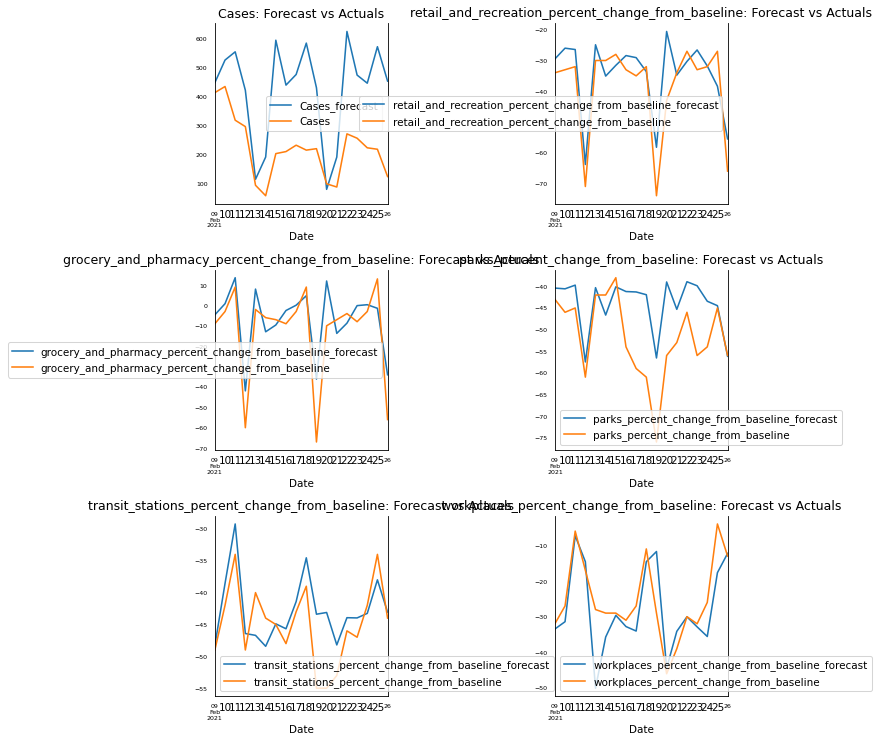

In [ ]:
fig, axes = plt.subplots(nrows=int(len(cases.columns)/2), ncols=2, dpi=75, figsize=(10,10))
for i, (col,ax) in enumerate(zip(cases.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(df_test['Cases'],df_results['Cases_forecast'])))
print("Root Mean Square Error for VAR Model: ",np.sqrt(mean_squared_error(df_test['Cases'],df_results['Cases_forecast'])))

Root Mean Square Error for VAR Model:  236.53410678622132


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_train.index, y=df_train["Cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test["Cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=df_results.index, y=df_results["Cases_forecast"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases VAR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
model_names=["Polynomial Regression", "Auto Regressive Model (AR)","SARIMA Model","Facebook's Prophet Model", "Vector Autoregressive Model (VAR)"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
3,Facebook's Prophet Model,157.020487
1,Auto Regressive Model (AR),213.739189
4,Vector Autoregressive Model (VAR),236.534107
2,SARIMA Model,292.703376
0,Polynomial Regression,501.545496
